# Linear Regression Project: Student Performance Prediction

## Objective
Build a linear regression model to predict student performance based on various factors including study habits, previous scores, and lifestyle factors.

## Instructions
Fill in the code cells below to complete the linear regression analysis. Follow the comments carefully and implement the required functionality in each cell.

In [ ]:
# Import Required Libraries

# This cell imports all necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import kagglehub, os, glob
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries specific to data preprocessing and the model itself
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Set visualization style
sns.set_style("whitegrid")
sns.set_palette("RdBu")

In [ ]:
# Load the Dataset

# This cell downloads and loads the student performance dataset. This step has been done for you!

# Download dataset from Kaggle
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")
print("Downloaded to:", path)
print("Files:", os.listdir(path))

# Find the CSV file in the downloaded folder
csv_candidates = glob.glob(os.path.join(path, "*.csv"))
assert len(csv_candidates) >= 1, "No CSV found in the downloaded dataset folder."
csv_path = csv_candidates[0]
print("Using CSV:", csv_path)

# Load the data into a pandas DataFrame. For more information on what pandas is, and why is it so important
# in ML, please follow this link: https://medium.com/@mayurkoshti12/why-is-pandas-popular-in-data-science-5a14ea7e25b4
data = pd.read_csv(csv_path)

Using Colab cache for faster access to the 'student-performance-multiple-linear-regression' dataset.
Downloaded to: /kaggle/input/student-performance-multiple-linear-regression
Files: ['Student_Performance.csv']
Using CSV: /kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


In [ ]:
# Initial Data Exploration

# Whenever we work with ML, it is crucial to explore the data to understand its structure and to know the values we have in the dataset itself.
# Without properly knowing what data you are working with, it is very easy to feed the model corrupted or null data which can slow down the overall
# training process.

# By convention, we call each column a feature of the dataset, with the target variable being the target. In this dataset, you will notice we have 6
# columns, which means we have 5 features and 1 target.

# TODO: Display the first 5 rows of the dataset to understand its structure.
data.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
# Dataset Information

# TODO: Get basic information about the dataset including data types and null values (Hint: Use the .info() method on the DataFrame)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
# Dataset Shape

# The shape of the dataset is another critical aspect of machine learning. Without knowing the shape, you will essentially have no idea the amount
# of rows and columns you are working with. The shape of a dataset usually is structured as a tuple: (x, y) where x is the number of rows in the
# dataset and y is the number of columns.

# TODO: Print the shape of the dataset.
data.shape

(10000, 6)

In [ ]:
# Check null values

# Null values are a problem in ML datasets where a certain feature does not have a value associated with it. This can cause the model
# training to take longer to find the correlation between a feature and the target variable. For example, if we have 4 data values to
# find the correlation between square footage and housing prices and 2 of the square footage values are empty, it will take longer for
# the model to find the correlation between the square footage and housing prices.

# TODO: Find the percentage of null values of each feature, by dividing the sum of total null values by the number of rows in the dataset
# (HINT: you only need to divide by the first index of the shape, so shape[0])
null_percentages = (data.isnull() / data.shape[0]) * 100
print(null_percentages)


      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0               0.0              0.0                         0.0          0.0   
1               0.0              0.0                         0.0          0.0   
2               0.0              0.0                         0.0          0.0   
3               0.0              0.0                         0.0          0.0   
4               0.0              0.0                         0.0          0.0   
...             ...              ...                         ...          ...   
9995            0.0              0.0                         0.0          0.0   
9996            0.0              0.0                         0.0          0.0   
9997            0.0              0.0                         0.0          0.0   
9998            0.0              0.0                         0.0          0.0   
9999            0.0              0.0                         0.0          0.0   

      Sample Question Paper

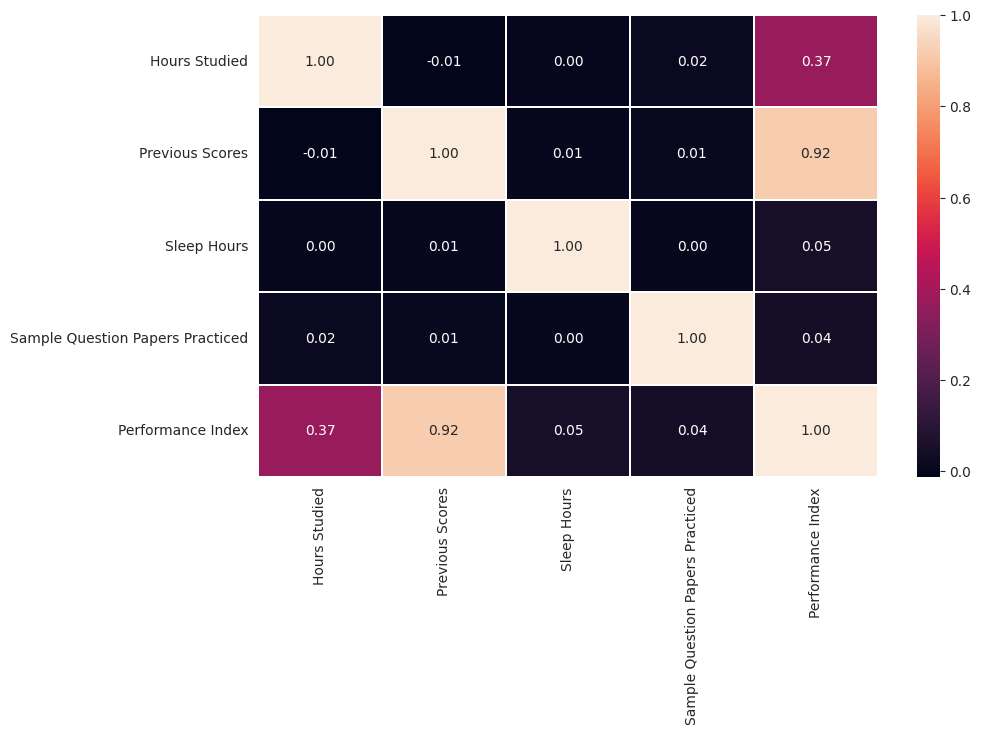

In [ ]:
# Correlation Analysis

# Here, we've created a correlation heatmap to visualize relationships between numerical variables. A correlation matrix tells you the relationship of one
# feature to another. This is another important step to visualize how the data's features relate to each other!

plt.figure(figsize = (10,6))
sns.heatmap(data.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()


In [ ]:
# Data Preprocessing

# In ML, the model cannot understand text, like we can. For one of the features, you will notice that there is a non-numerical value. To deal with this,
# we will need to use a LabelEncoder. This tool converts text into numerical values that the model can understand and work with! We'll leave it to you to
# figure out which features need to be encoded.

# TODO: Encode categorical variables using LabelEncoder



In [ ]:
# Verify Encoding

# Now that you've encoded the relevant features, display the first few rows again just to confirm that the encoding worked.

# TODO: Display the first 5 rows again to confirm encoding
print(data.dtypes)
encoder = LabelEncoder()
data['Extracurricular Activities'] = encoder.fit_transform(data['Extracurricular Activities'])
print(data.head())


Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object
   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                        

In [ ]:
# Prepare Features and Target Variables

# Now comes the fun part! Now that you've successfully examined and cleaned the data, you have completed the data preprocessing step. Doing that was
# critical because without proper structured and clean data, the model's performance will take a drastic hit or not even fit as intended.

# That being said, it is finally time to begin the process of training. So first, we need to split the data into the target and training sets.
# You will have noticed that the dataset is 6 columns as of now, but we need to have all the values for training (our 5 features) and target seperate
# in order to train our model.

# TODO: Separate the dataset into features (X) and target variable (y)
# 1. Create 'Train' by dropping the 'Performance Index' column (this will be our features)
# 2. Create 'Target' by selecting only the 'Performance Index' column (this is what we want to predict)

Train = data.drop('Performance Index', axis=1)
Target = data['Performance Index']

In [ ]:
# Verify Feature Preparation

# Now that we have split our dataset into Test and Train, we need to verify that the they are what we are looking for. You can print out a sample
# of the Train set to verify that it is correct.

# TODO: Display a sample of the feature data to verify it looks correct
Train.head()
Train.sample(5, random_state = 42)
print(list(Train.columns))

['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']


In [ ]:
# Verify Target Variable

# Do the same for the target set!

# TODO: Display the first 5 values of the target variable
Target.head()


,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0


In [ ]:
# Train-Test Split

# Here comes the final part, and probably the most recognized! We need to split the data into a test and train dataset.
# We split our data because we want to evaulate the performace of our model on the test set while training the model on the train set.
# This way we can test our model on "fresh" data that it won't have been trained on.

# TODO: Split the data into training and testing sets
# 1. Use train_test_split with Train and Target as inputs
# 2. Set test_size=0.2 (20% for testing, 80% for training)
# 3. Set random_state=42 for reproducible results. This essentially means that if you re-run the code, you will get the same data points used!
# 4. Assign to X_train, X_test, y_train, y_test

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(Train, Target, test_size = 0.2, random_state = 42)

# Print the shapes to verify the split
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)


X_train shape:  (8000, 5)
y_train shape:  (8000,)
X_test shape:  (2000, 5)
y_test shape:  (2000,)


In [ ]:
# Cell 12: Create and Train the Model

# Finally, create the Linear Regression model and fir it on the newly created sets above! We will leave it to you to figure out which sets to use!

# TODO: Create a Linear Regression model and train it
# 1. Create a LinearRegression object and assign it to 'model'
# 2. Fit the model using the training data (X_train and y_train)

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Evaluate Training Performance

# Now that we have fitted and trained the model, we need to evaluate how accurate it was on the training set. The higher the score here, the better
# and more accurate our model is!

# TODO: Calculate the R² score on the training data

training_score =model.score(X_train, y_train)
print(f"Training R² Score: {training_score:.4f}")

Training R² Score: 0.9887


In [ ]:
# Make Predictions

# Now, we can use the model that we fitted to make predictions on the test set! We can use this to compare with the actual values.

# TODO: Use the trained model to make predictions on the test set
# 1. Use model.predict() on X_test to get predictions
# 2. Round the predictions to 1 decimal place using np.round() with decimals=1
# 3. Create a DataFrame showing actual vs predicted values

predict = model.predict(X_test)
predict = np.round(predict, 1)

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    "Actual Performance": y_test,
    "Predicted Performance": predict
})

# Display the comparison
print(comparison_df)

      Actual Performance  Predicted Performance
6252                51.0                   54.7
4684                20.0                   22.6
1731                46.0                   47.9
4742                28.0                   31.3
4521                41.0                   43.0
...                  ...                    ...
6412                45.0                   46.9
8285                66.0                   62.7
7853                16.0                   16.8
1095                65.0                   63.3
6929                47.0                   45.9

[2000 rows x 2 columns]


In [ ]:
# Make a Single Prediction

# Now, it's your turn! Fill out the example student data to see how well a student may do based on the stats you gave them on their exams.

# TODO: Test the model with a single example
# Use the provided values to make a prediction for one student

# Example student data
hours_studied = 7
previous_score = 99
extra_curricular = 1  # 1 for Yes, 0 for No
sleep_hours = 9
practice_exams_studied = 1

single_prediction = pd.DataFrame([[hours_studied, previous_score, extra_curricular, sleep_hours, practice_exams_studied]],
                                columns = Train.columns)

single_prediction = model.predict(single_prediction)
print(f"Predicted Performance for sample student: {single_prediction[0]:.2f}")


Predicted Performance for sample student: 91.82
